18130122 Cielo Luz Elena Llamas Servin

18130141 Cristyaquelin Dominguez Felix

18130159 Yañez Gonzalez Christian Emmanuel

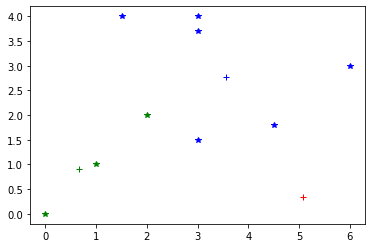

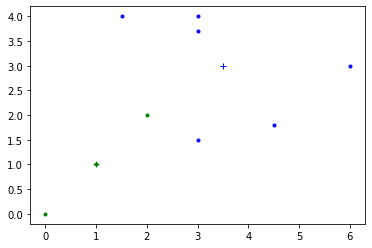

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def inicializarRandom(datos, k):
    ren, col = datos.shape
    min = np.min(datos, axis=0)
    max = np.max(datos, axis=0)
    centroides = np.random.random([k, col]) * (max - min) + min
    return centroides

def getDistancia(a, b):
    return np.linalg.norm(a-b)

def asignacion(datos, centroides):
    numDatos, numCol = datos.shape
    K, numCol = centroides.shape
    distancias = np.zeros([numDatos, K])
    for i in range(numDatos):
        for j in range(K):
            distancias[i, j] = getDistancia(datos[i,:], centroides[j,:])
    indices = np.argmin(distancias, axis=1)
    return indices

datos = np.genfromtxt('./kmedias-1.csv')

K = 3
N, col = datos.shape

centroides = inicializarRandom(datos, K)

indices = asignacion(datos, centroides)

colores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(K):
    plt.plot(centroides[i, 0], centroides[i, 1], f"{colores[i]}+")
for i in range(N):
    plt.plot(datos[i, 0], datos[i, 1], f"{colores[indices[i]]}*")
plt.show()

def getIndice(indices, valor):
    A = []
    for index, value in enumerate(indices):
        if (value == valor):
            A.append(index)
    return A

def actualizarCentroides(datos, indices):
    ret = []
    list_indice = []
    for value in indices:
        if (value not in list_indice):
            list_indice.append(value)
    for index in list_indice:
        lista_1 = getIndice(indices, index)
        A = datos[lista_1, :]
        a = np.mean(A, axis=0)
        ret.append({'pos': a, 'color': index})
    return ret

centroides = actualizarCentroides(datos, indices)

for i, v in enumerate(centroides):
    plt.plot(v['pos'][0], v['pos'][1], f"{colores[v['color']]}+")

for i in range(N):
    plt.plot(datos[i, 0], datos[i, 1], f"{colores[indices[i]]}.")

plt.show()